In [1]:
import csv
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
import numpy as np
import csv
import json
from sklearn.preprocessing import MinMaxScaler

In [2]:
URL = 'https://financialmodelingprep.com/api/v3/historical-price-full/ADBE?from=2013-05-22&to=2022-06-06&apikey=7721d4077165586091b074b581a88c16'
res = urlopen(URL)
data = res.read().decode('utf-8')
data = json.loads(data)
fields = ['date','open','close','high','low','volume']
with open('adobe.csv','w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    for i in range(len(data['historical'])):
        csvwriter.writerow([data['historical'][i]['date'],data['historical'][i]['open'],data['historical'][i]['close'],data['historical'][i]['high'],data['historical'][i]['low'],data['historical'][i]['volume']])

In [7]:
dataset = pd.read_csv('adobe.csv')
dataset = dataset.reindex(index = dataset.index[::-1])

In [8]:

#dataset = dataset.reindex(index = dataset.index[::-1])
#Saving Dataset locally
#dataset.to_csv('dataset', index = False)

#12 Months Rolling Average column
#dataset['12MSRA'] = dataset['close'].rolling(12).mean()

#Splitting Training and Test set
train = dataset.iloc[:2000,:]
test = dataset.iloc[2000:,:]
#Saving locally
train.to_csv('train', index = False)
test.to_csv('test', index = False)
#dataset.plot(x = 'date', y = ['open', 'close'])
dataset

,date,open,close,high,low,volume
2276,2013-05-22,44.12,43.17,44.3100,42.95,3026400.0
2275,2013-05-23,42.66,42.77,43.1400,42.57,3339700.0
2274,2013-05-24,42.32,42.43,42.5300,41.91,3766200.0
2273,2013-05-28,42.78,42.91,43.1300,42.65,2655900.0
2272,2013-05-29,42.75,42.60,42.8700,42.39,3280900.0
2271,2013-05-30,42.65,43.19,43.3800,42.50,2755500.0
2270,2013-05-31,42.92,42.91,43.5500,42.66,3133200.0
2269,2013-06-03,42.98,43.46,43.4800,42.76,2884800.0
2268,2013-06-04,43.67,44.39,44.8000,43.53,5249400.0
2267,2013-06-05,44.39,43.84,44.5800,43.81,3385600.0


In [9]:
test.plot(x='date',y=['close'])

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [10]:
test

,date,open,close,high,low,volume
276,2021-05-03,510.97,503.46,511.7400,501.12,1469676.0
275,2021-05-04,499.47,490.70,499.4700,484.83,2295350.0
274,2021-05-05,495.69,486.69,498.6300,484.44,1736113.0
273,2021-05-06,485.67,483.61,485.6700,475.92,2508311.0
272,2021-05-07,496.00,488.73,499.1500,485.92,1639253.0
271,2021-05-10,487.54,479.38,489.0400,478.63,1982694.0
270,2021-05-11,471.03,485.19,486.9100,468.51,2294419.0
269,2021-05-12,477.19,472.09,480.7700,469.57,2401974.0
268,2021-05-13,478.01,474.16,480.4600,471.77,2007026.0
267,2021-05-14,481.63,486.56,488.3200,478.76,1861129.0


In [11]:
#Normalising Closing Values
ss= MinMaxScaler(feature_range=(0,1))
train_close = train.iloc[:,2:3].values
print(train_close)
train_norm= ss.fit_transform(train_close)
train_norm

[[ 43.17]
 [ 42.77]
 [ 42.43]
 ...
 [515.48]
 [516.09]
 [508.34]]


array([[1.50599348e-03],
       [6.91942952e-04],
       [0.00000000e+00],
       ...,
       [9.62716510e-01],
       [9.63957937e-01],
       [9.48185708e-01]])

In [12]:
#Constructing Training Numpy Arrays
xtrain = []
ytrain = []
for i in range(300, len(train_norm)):
    xtrain.append(train_norm[i-300:i,0])
    ytrain.append(train_norm[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [13]:
xtrain

array([[1.50599348e-03, 6.91942952e-04, 0.00000000e+00, ...,
        6.16032740e-02, 6.07281697e-02, 5.99548217e-02],
       [6.91942952e-04, 0.00000000e+00, 9.76860638e-04, ...,
        6.07281697e-02, 5.99548217e-02, 5.45820882e-02],
       [0.00000000e+00, 9.76860638e-04, 3.45971476e-04, ...,
        5.99548217e-02, 5.45820882e-02, 5.39511990e-02],
       ...,
       [6.93672809e-01, 6.84881064e-01, 6.72649954e-01, ...,
        9.63449156e-01, 9.63164238e-01, 9.66461143e-01],
       [6.84881064e-01, 6.72649954e-01, 6.41024091e-01, ...,
        9.63164238e-01, 9.66461143e-01, 9.62716510e-01],
       [6.72649954e-01, 6.41024091e-01, 6.21466527e-01, ...,
        9.66461143e-01, 9.62716510e-01, 9.63957937e-01]])

In [14]:
print(xtrain.shape)
xtrain

(1700, 300)


array([[1.50599348e-03, 6.91942952e-04, 0.00000000e+00, ...,
        6.16032740e-02, 6.07281697e-02, 5.99548217e-02],
       [6.91942952e-04, 0.00000000e+00, 9.76860638e-04, ...,
        6.07281697e-02, 5.99548217e-02, 5.45820882e-02],
       [0.00000000e+00, 9.76860638e-04, 3.45971476e-04, ...,
        5.99548217e-02, 5.45820882e-02, 5.39511990e-02],
       ...,
       [6.93672809e-01, 6.84881064e-01, 6.72649954e-01, ...,
        9.63449156e-01, 9.63164238e-01, 9.66461143e-01],
       [6.84881064e-01, 6.72649954e-01, 6.41024091e-01, ...,
        9.63164238e-01, 9.66461143e-01, 9.62716510e-01],
       [6.72649954e-01, 6.41024091e-01, 6.21466527e-01, ...,
        9.66461143e-01, 9.62716510e-01, 9.63957937e-01]])

In [15]:
xtrain = np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [16]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [17]:
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))

#Output layer
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting
regression.fit(xtrain,ytrain,batch_size=32,epochs=100)

Epoch 1/100
54/54 [==============================] - 25s 308ms/step - loss: 0.0183
Epoch 2/100
54/54 [==============================] - 19s 353ms/step - loss: 0.0033
Epoch 3/100
54/54 [==============================] - 17s 320ms/step - loss: 0.0030
Epoch 4/100
54/54 [==============================] - 20s 368ms/step - loss: 0.0026
Epoch 5/100
54/54 [==============================] - 23s 423ms/step - loss: 0.0025
Epoch 6/100
54/54 [==============================] - 21s 378ms/step - loss: 0.0024
Epoch 7/100
54/54 [==============================] - 21s 380ms/step - loss: 0.0026
Epoch 8/100
54/54 [==============================] - 18s 338ms/step - loss: 0.0023
Epoch 9/100
54/54 [==============================] - 20s 376ms/step - loss: 0.0024
Epoch 10/100
54/54 [==============================] - 22s 407ms/step - loss: 0.0022
Epoch 11/100
54/54 [==============================] - 20s 369ms/step - loss: 0.0020
Epoch 12/100
54/54 [==============================] - 18s 332ms/step - loss: 0.0021
E

54/54 [==============================] - 17s 310ms/step - loss: 8.7292e-04
Epoch 98/100
54/54 [==============================] - 16s 295ms/step - loss: 8.4865e-04
Epoch 99/100
54/54 [==============================] - 19s 347ms/step - loss: 8.1802e-04
Epoch 100/100
54/54 [==============================] - 16s 289ms/step - loss: 9.0650e-04


In [18]:
#Creating Test Numpy array
test_close = test.iloc[:,2:3].values
#Concatinating test and training set to obtain test input with 30 time series values.
total= pd.concat([train['close'],test['close']],axis=0)
#print(total[98-19-30:])
test_input = total[len(total)-len(test)-300:].values

test_input = test_input.reshape(-1,1)
print(len(test_input))

577


In [19]:

test_input = ss.transform(test_input)
#test_input = np.array(test_input)
print(test_input)


[[0.64102409]
 [0.62146653]
 [0.62867087]
 [0.60054543]
 [0.61601239]
 [0.6468649 ]
 [0.6225655 ]
 [0.6541303 ]
 [0.62803999]
 [0.59901908]
 [0.53597087]
 [0.59008488]
 [0.55518246]
 [0.49366059]
 [0.59643447]
 [0.49575677]
 [0.54822233]
 [0.51321816]
 [0.53947129]
 [0.5147038 ]
 [0.53898286]
 [0.54453875]
 [0.53621509]
 [0.5703238 ]
 [0.53605228]
 [0.56161346]
 [0.56130819]
 [0.52664999]
 [0.53224659]
 [0.51118303]
 [0.56311946]
 [0.54236117]
 [0.55915096]
 [0.56224435]
 [0.56621285]
 [0.60715959]
 [0.59043085]
 [0.61108738]
 [0.61395691]
 [0.61552396]
 [0.5831858 ]
 [0.59901908]
 [0.59616991]
 [0.61393656]
 [0.62289112]
 [0.59226246]
 [0.62425465]
 [0.63335166]
 [0.61340743]
 [0.62413254]
 [0.63841913]
 [0.65142359]
 [0.66009322]
 [0.66157887]
 [0.66953621]
 [0.65667421]
 [0.64336449]
 [0.63691314]
 [0.65708124]
 [0.66251503]
 [0.67112361]
 [0.6943851 ]
 [0.69141382]
 [0.69770236]
 [0.68013922]
 [0.67716793]
 [0.68665162]
 [0.70042943]
 [0.70669762]
 [0.70824431]
 [0.70718605]
 [0.69

In [20]:
xtest = []
for i in range(300,577):
    xtest.append(test_input[i-300:i,0].tolist())


#print(len(xtest[18]))
xtest = np.array(xtest)

In [21]:
xtest = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
xtest.shape

(277, 300, 1)

In [22]:
test

,date,open,close,high,low,volume
276,2021-05-03,510.97,503.46,511.7400,501.12,1469676.0
275,2021-05-04,499.47,490.70,499.4700,484.83,2295350.0
274,2021-05-05,495.69,486.69,498.6300,484.44,1736113.0
273,2021-05-06,485.67,483.61,485.6700,475.92,2508311.0
272,2021-05-07,496.00,488.73,499.1500,485.92,1639253.0
271,2021-05-10,487.54,479.38,489.0400,478.63,1982694.0
270,2021-05-11,471.03,485.19,486.9100,468.51,2294419.0
269,2021-05-12,477.19,472.09,480.7700,469.57,2401974.0
268,2021-05-13,478.01,474.16,480.4600,471.77,2007026.0
267,2021-05-14,481.63,486.56,488.3200,478.76,1861129.0


In [23]:
predicted_value = regression.predict(xtest)
predicted_value = ss.inverse_transform(predicted_value)

9/9 [==============================] - 2s 103ms/step


In [108]:
predicted_value

array([[ 90.183586],
       [ 91.632195],
       [ 92.495   ],
       [ 92.58345 ],
       [ 92.08599 ],
       [ 91.2812  ],
       [ 90.4039  ],
       [ 89.57357 ],
       [ 88.77028 ],
       [ 87.97143 ],
       [ 87.262474],
       [ 86.75769 ],
       [ 86.644066],
       [ 87.055824],
       [ 87.97336 ],
       [ 89.171036],
       [ 90.31349 ],
       [ 91.58416 ],
       [ 93.29782 ],
       [ 95.5837  ],
       [ 98.29351 ],
       [101.22423 ],
       [104.35594 ],
       [106.765976],
       [107.83023 ],
       [107.4344  ],
       [105.955864],
       [104.069244],
       [102.25375 ],
       [101.13106 ],
       [100.73248 ],
       [100.938095],
       [101.245705],
       [101.40384 ],
       [101.416046],
       [101.61863 ],
       [102.03321 ],
       [102.60655 ],
       [103.13072 ],
       [103.74979 ],
       [104.43386 ],
       [105.03088 ],
       [105.37565 ],
       [105.37487 ],
       [105.13644 ],
       [104.74607 ],
       [104.12273 ],
       [103.3

In [109]:
test

,date,open,close,high,low,volume
232,2021-07-06,94.88,94.47,95.41,93.320,45317290.0
231,2021-07-07,95.02,90.54,95.44,90.310,51932874.0
230,2021-07-08,87.86,89.74,90.34,87.450,45719687.0
229,2021-07-09,90.04,90.90,91.26,88.530,35366221.0
228,2021-07-12,91.22,90.81,91.90,89.650,28614609.0
...,...,...,...,...,...,...
4,2022-05-31,102.43,101.86,104.55,100.040,125107089.0
3,2022-06-01,102.13,101.22,103.57,99.550,99330284.0
2,2022-06-02,100.78,108.59,109.50,100.780,120936490.0
1,2022-06-03,105.80,106.30,109.39,104.650,108215108.0


In [24]:
testplot = np.array(test['close'
])

In [25]:
predicted_value.shape

(277, 1)

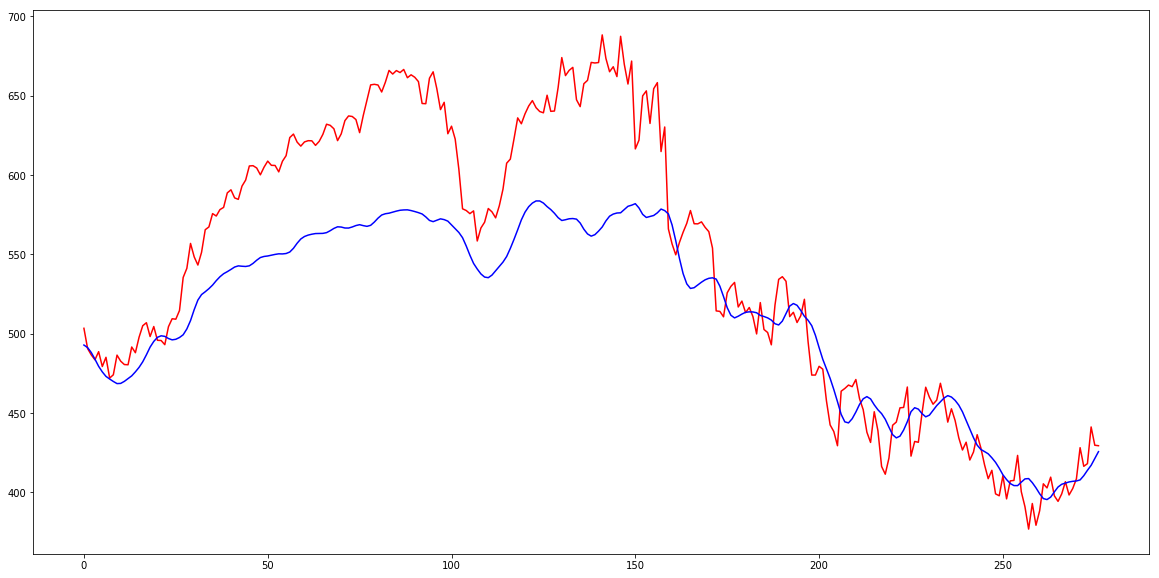

In [26]:
plt.figure(figsize=(20,10))
plt.plot(testplot, 'red')
plt.plot(predicted_value,'blue')
plt.show()